<a href="https://colab.research.google.com/github/SergioCortes98/Aprendizaje-Automatico/blob/main/Tarea4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b> Tarea.4

Alumno:Sergio Cortes Cepeda

Materia:Aprendizaje Automatico

Matricula:726343</b></h1>



In [31]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Cargar tus datos
ruta = "/content/sample_data/actividad_real.csv"
df = pd.read_csv(ruta, encoding='latin-1')
df.head(47)


,Tipo de actividad,Fecha,Favorito,TÃ­tulo,Distancia,CalorÃ­as,Tiempo,Frecuencia cardiaca media,FC mÃ¡xima,Cadencia de carrera media,...,Longitud media de zancada,Training Stress ScoreÂ®,Pasos,DescompresiÃ³n,Mejor tiempo de vuelta,NÃºmero de vueltas,Tiempo en movimiento,Tiempo transcurrido,Altura mÃ­nima,Altura mÃ¡xima
0,Carrera,02/11/2025 06:47,False,San Pedro Garza GarcÃ­a Carrera,7.45,573,00:45,164,176,175,...,0.95,0,"7,896",No,03:03.5,8,00:44:28,00:44:38,598,602
1,Carrera,26/10/2025 06:37,False,Guadalupe Carrera,14.74,"1,235",01:33,176,191,169,...,0.94,0,"15,654",No,04:42.0,15,01:32:19,01:32:22,482,531
2,Carrera,05/10/2025 07:07,False,San Pedro Garza GarcÃ­a Carrera,12.12,990,01:14,174,191,167,...,0.98,0,"12,384",No,00:45.8,13,01:13:49,01:14:00,593,639
3,Carrera,07/06/2025 08:23,False,Carrera,2.61,256,00:20,164,184,162,...,0.83,0,"3,150",No,04:22.9,3,00:19:17,00:19:22,--,--
4,Carrera,06/06/2025 19:43,False,San NicolÃ¡s de los Garza Carrera,2.73,307,00:25,163,189,138,...,0.78,0,"3,564",No,01:36.9,10,00:23:59,00:24:49,496,498
5,Entrenamiento en cinta,11/05/2025 12:24,False,Entrenamiento en cinta,10.27,789,01:01,165,177,160,...,1.01,0,"9,662",No,04:39.6,10,00:59:33,01:00:06,--,--
6,Entrenamiento en cinta,20/04/2025 15:05,False,Entrenamiento en cinta,4.70,409,00:31,169,185,156,...,0.66,0,"4,666",No,04:13.1,5,00:29:53,00:30:03,--,--
7,Carrera,06/04/2025 12:48,False,San NicolÃ¡s de los Garza Carrera,3.75,296,00:27,153,179,160,...,0.87,0,"4,316",No,05:58.6,4,00:26:47,00:26:48,487,499
8,Carrera en interiores,29/03/2025 08:19,False,Carrera en interiores,3.95,256,00:24,145,169,155,...,1.08,0,"3,662",No,00:00.8,8,00:20:53,00:40:25,--,--
9,Carrera,23/03/2025 07:10,False,Monterrey Carrera,10.02,787,00:58,171,189,173,...,1.01,0,"9,914",No,00:00.6,12,00:57:16,00:57:19,501,549


In [32]:
# Renombrar columnas

df = df.rename(columns={
    "Tipo de actividad": "tipo",
    "Fecha": "fecha",
    "Favorito": "favorito",
    "TÃ­tulo": "titulo",
    "Distancia": "distancia_km",
    "CalorÃ­as": "calorias",
    "Tiempo": "tiempo",
    "Frecuencia cardiaca media": "fc_media",
    "FC mÃ¡xima": "fc_max",
    "Cadencia de carrera media": "cadencia_media",
    "Cadencia de carrera mÃ¡xima": "cadencia_max",
    "Ritmo medio": "ritmo_medio",
    "Ritmo Ã³ptimo": "ritmo_optimo",
    "Ascenso total": "ascenso",
    "Descenso total": "descenso",
    "Longitud media de zancada": "zancada_m",
    "Training Stress ScoreÂ®": "tss",
    "Pasos": "pasos",
    "DescompresiÃ³n": "descompresion",
    "Mejor tiempo de vuelta": "mejor_vuelta",
    "NÃºmero de vueltas": "num_vueltas",
    "Tiempo en movimiento": "tiempo_mov",
    "Tiempo transcurrido": "tiempo_total",
    "Altura mÃ­nima": "alt_min",
    "Altura mÃ¡xima": "alt_max"
})
df.columns

Index(['tipo', 'fecha', 'favorito', 'titulo', 'distancia_km', 'calorias',
       'tiempo', 'fc_media', 'fc_max', 'cadencia_media', 'cadencia_max',
       'ritmo_medio', 'ritmo_optimo', 'ascenso', 'descenso', 'zancada_m',
       'tss', 'pasos', 'descompresion', 'mejor_vuelta', 'num_vueltas',
       'tiempo_mov', 'tiempo_total', 'alt_min', 'alt_max'],
      dtype='object')

In [33]:
import numpy as np
import pandas as pd

## Columnas que deben ser numéricas
cols_numericas = [
    "tiempo", "ritmo_medio", "ritmo_optimo", "pasos",
    "tiempo_mov", "calorias","tiempo_total", "alt_min", "alt_max"
]

## Limpieza y conversión
for col in cols_numericas:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)                   # convierte todo a texto
            .str.replace(",", "", regex=False)  # elimina comas
            .str.replace("--", "", regex=False) # elimina guiones
            .str.replace(":", ".", regex=False) # cambia ":" por "." si aplica
            .str.strip()                        # quita espacios
            .replace("", np.nan)                # convierte vacíos en NaN
        )
        df[col] = pd.to_numeric(df[col], errors="coerce")  #conversión a numérico

## Verificación
print(df[cols_numericas].dtypes)


tiempo          float64
ritmo_medio     float64
ritmo_optimo    float64
pasos             int64
tiempo_mov      float64
calorias          int64
tiempo_total    float64
alt_min         float64
alt_max         float64
dtype: object


In [7]:
print(df.dtypes)

tipo               object
fecha              object
favorito             bool
titulo             object
distancia_km      float64
calorias            int64
tiempo            float64
fc_media            int64
fc_max              int64
cadencia_media      int64
cadencia_max        int64
ritmo_medio       float64
ritmo_optimo      float64
ascenso            object
descenso           object
zancada_m         float64
tss                 int64
pasos               int64
descompresion      object
mejor_vuelta       object
num_vueltas         int64
tiempo_mov        float64
tiempo_total      float64
alt_min           float64
alt_max           float64
dtype: object


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8, 5)


<center><h1><b>Variables numéricas y No numéricas</b></h1></center>






In [35]:
# Ver las columnas numéricas
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Columnas numéricas:\n", num_cols)

# Variables no numericas
num_cols = df.select_dtypes(include=['object']).columns
print("Columnas no numéricas:\n", num_cols)



Columnas numéricas:
 Index(['distancia_km', 'calorias', 'tiempo', 'fc_media', 'fc_max',
       'cadencia_media', 'cadencia_max', 'ritmo_medio', 'ritmo_optimo',
       'zancada_m', 'tss', 'pasos', 'num_vueltas', 'tiempo_mov',
       'tiempo_total', 'alt_min', 'alt_max'],
      dtype='object')
Columnas no numéricas:
 Index(['tipo', 'fecha', 'titulo', 'ascenso', 'descenso', 'descompresion',
       'mejor_vuelta'],
      dtype='object')


In [37]:
# Variables independientes (X) y dependiente (y)

X = df.select_dtypes(include=['float64', 'int64']).drop(columns=['calorias'])
y = df['calorias']

# tamaños
print("Tamaño de X:", X.shape)
print("Tamaño de y:", y.shape)
X.head(48)




Tamaño de X: (46, 16)
Tamaño de y: (46,)


,distancia_km,tiempo,fc_media,fc_max,cadencia_media,cadencia_max,ritmo_medio,ritmo_optimo,zancada_m,tss,pasos,num_vueltas,tiempo_mov,tiempo_total,alt_min,alt_max
0,7.45,0.45,164,176,175,188,5.59,2.56,0.95,0,7896,8,NaN,NaN,598.0,602.0
1,14.74,1.33,176,191,169,188,6.16,5.24,0.94,0,15654,15,NaN,NaN,482.0,531.0
2,12.12,1.14,174,191,167,177,6.06,4.04,0.98,0,12384,13,NaN,NaN,593.0,639.0
3,2.61,0.20,164,184,162,224,7.26,3.29,0.83,0,3150,3,NaN,NaN,NaN,NaN
4,2.73,0.25,163,189,138,176,9.06,3.18,0.78,0,3564,10,NaN,NaN,496.0,498.0
5,10.27,1.01,165,177,160,173,5.51,4.40,1.01,0,9662,10,NaN,NaN,NaN,NaN
6,4.70,0.31,169,185,156,185,6.23,8.23,0.66,0,4666,5,NaN,NaN,NaN,NaN
7,3.75,0.27,153,179,160,180,7.09,5.13,0.87,0,4316,4,NaN,NaN,487.0,499.0
8,3.95,0.24,145,169,155,198,5.55,2.26,1.08,0,3662,8,NaN,NaN,NaN,NaN
9,10.02,0.58,171,189,173,181,5.43,4.32,1.01,0,9914,12,NaN,NaN,501.0,549.0


In [38]:
# Revisar la desviación estándar de las variables numéricas
std_values = X.std()
print(std_values)

# Ver si hay columnas con desviación estándar igual a 0
cols_constantes = std_values[std_values == 0].index
print("Columnas con desviación estándar 0:", list(cols_constantes))

distancia_km         2.899749
tiempo               0.247258
fc_media            19.980437
fc_max              21.102510
cadencia_media      19.889404
cadencia_max        32.740976
ritmo_medio          3.052636
ritmo_optimo         2.779002
zancada_m            0.188565
tss                  0.000000
pasos             2821.629324
num_vueltas          3.289274
tiempo_mov                NaN
tiempo_total              NaN
alt_min             50.254608
alt_max             49.355201
dtype: float64
Columnas con desviación estándar 0: ['tss']


In [39]:
# Eliminar columnas constantes
if len(cols_constantes) > 0:
    X = X.drop(columns=cols_constantes)
    print(f"Se eliminaron columnas sin variabilidad: {list(cols_constantes)}")
else:
    print("No hay columnas con desviación estándar igual a 0 ✅")


Se eliminaron columnas sin variabilidad: ['tss']


In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [45]:
import numpy as np

# Reemplaza ±inf por NaN
X = X.replace([np.inf, -np.inf], np.nan)


In [49]:
from sklearn.pipeline import make_pipeline
import pandas as pd

k = min(8, X.shape[1])

pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    SelectKBest(score_func=f_regression, k=k)
)

pipe.fit(X, y)

selector = pipe.named_steps['selectkbest']
mask_sel = selector.get_support()
top_vars = X.columns[mask_sel]

scores = pd.DataFrame({
    'Variable': X.columns,
    'Score_F': selector.scores_,
    'p_value': selector.pvalues_
}).sort_values('Score_F', ascending=False)

print(f"TOP {k} variables seleccionadas:", list(top_vars))
scores.head(15)
##Muestro las mas relevantes
print(scores.head(k))


TOP 8 variables seleccionadas: ['distancia_km', 'tiempo', 'fc_media', 'fc_max', 'cadencia_media', 'ritmo_medio', 'pasos', 'num_vueltas']
          Variable      Score_F       p_value
0     distancia_km  1535.114677  7.489808e-36
9            pasos  1470.542107  1.877740e-35
1           tiempo   450.346512  9.645779e-25
10     num_vueltas   107.785552  2.075844e-13
2         fc_media    42.428488  5.921604e-08
3           fc_max    25.010573  9.608273e-06
6      ritmo_medio    11.161908  1.710001e-03
4   cadencia_media     9.656851  3.300444e-03


/tmp/ipython-input-2976824124.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=scores.head(k), x='Score_F', y='Variable', palette='viridis')


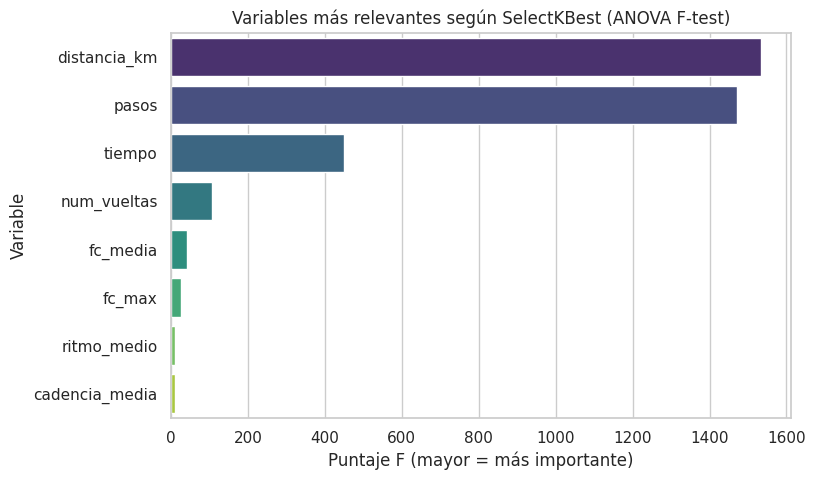

In [50]:
# Selección con SelectKBest + f_regression

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=scores.head(k), x='Score_F', y='Variable', palette='viridis')
plt.title('Variables más relevantes según SelectKBest (ANOVA F-test)')
plt.xlabel('Puntaje F (mayor = más importante)')
plt.ylabel('Variable')
plt.show()


In [51]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Definir variables
k = min(8, X.shape[1])

# --- Crear el pipeline ---
pipe_mi = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    SelectKBest(score_func=mutual_info_regression, k=k)
)

# Ajustar el modelo
pipe_mi.fit(X, y)

# resultados
selector_mi = pipe_mi.named_steps['selectkbest']
mask_mi = selector_mi.get_support()
top_vars_mi = X.columns[mask_mi]

scores_mi = pd.DataFrame({
    'Variable': X.columns,
    'Mutual_Info': selector_mi.scores_
}).sort_values('Mutual_Info', ascending=False)

print(f"TOP {k} variables seleccionadas por Mutual Information:", list(top_vars_mi))
scores_mi.head(k)


TOP 8 variables seleccionadas por Mutual Information: ['distancia_km', 'tiempo', 'fc_media', 'fc_max', 'ritmo_medio', 'zancada_m', 'pasos', 'num_vueltas']


,Variable,Mutual_Info
0,distancia_km,1.128654
9,pasos,1.092816
1,tiempo,0.899378
10,num_vueltas,0.478680
2,fc_media,0.289328
8,zancada_m,0.255737
6,ritmo_medio,0.218866
3,fc_max,0.210204


/tmp/ipython-input-3271278366.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=scores_mi.head(k), x='Mutual_Info', y='Variable', palette='mako')


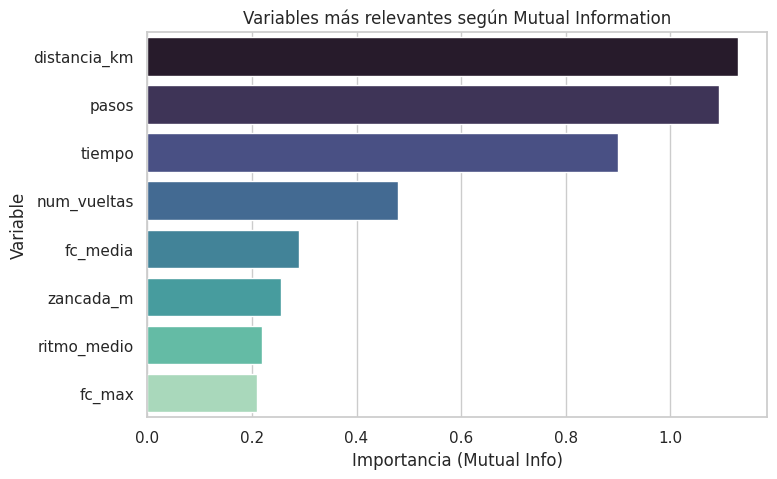

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(data=scores_mi.head(k), x='Mutual_Info', y='Variable', palette='mako')
plt.title('Variables más relevantes según Mutual Information')
plt.xlabel('Importancia (Mutual Info)')
plt.ylabel('Variable')
plt.show()


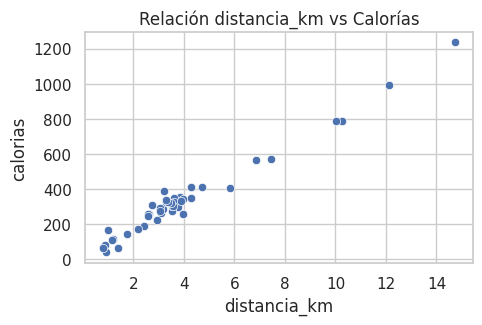

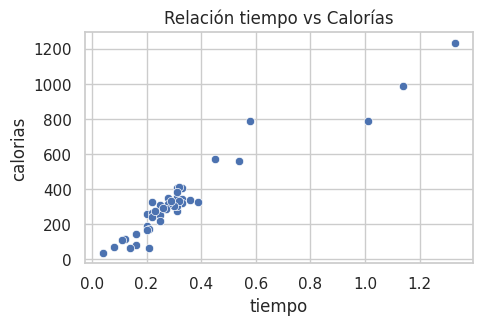

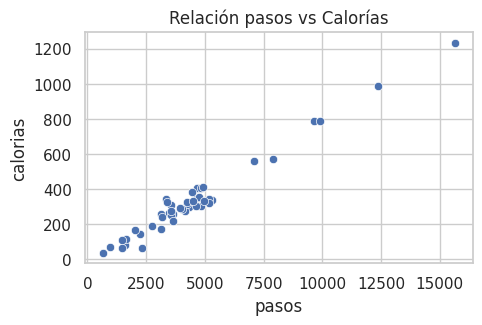

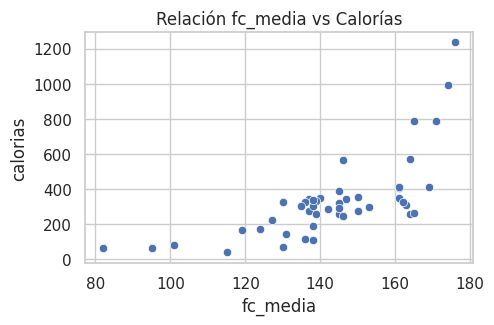

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['distancia_km', 'tiempo', 'pasos', 'fc_media']:
    plt.figure(figsize=(5,3))
    sns.scatterplot(x=df[col], y=df['calorias'])
    plt.title(f'Relación {col} vs Calorías')
    plt.show()

<div align="center" style="font-size:20px;">

Hice una representación gráfica que me permitiera observar debido a que <code>f_regression</code>, que mide lo lineal, me salió muy similar a <code>mutual_info_regression</code>.<br><br>

Llegué a la conclusión de dos cosas: quizá por el tamaño de mi muestra no se permite observar relaciones no lineales; sin embargo, en los datos observados de <code>fc_media</code> se ve una ligera variabilidad donde el incremento en calorías tiende a desacelerarse a partir de ciertos valores de frecuencia cardíaca.

En conclusión general las variables por debajo de .4 se consideran menos relevantes hacia el cálculo de calorías quemadas, esto esta correlacionado con f_test.

</div>



<center><h1><b>Exhaustive Feature Selection (EFS)</b></h1></center>


In [64]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
model = LinearRegression()
efs = EFS(
    estimator=model,
    min_features=1,
    max_features=6,
    scoring='r2',
    cv=5,
    print_progress=True,
    n_jobs=-1
)
efs = efs.fit(X, y)
##Resultados
print('Mejor puntuación (R²):', efs.best_score_)
print('Variables seleccionadas:', efs.best_feature_names_)


Features: 1485/1485

Mejor puntuación (R²): 0.9647500747015357
Variables seleccionadas: ('tiempo', 'fc_media', 'ritmo_medio', 'zancada_m', 'pasos')


In [65]:
import pandas as pd

resultados = pd.DataFrame.from_dict(efs.get_metric_dict()).T
resultados = resultados.sort_values(by='avg_score', ascending=False)
resultados.head(10)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
820,"(1, 2, 6, 8, 9)","[0.9664044316536884, 0.9593715179843254, 0.981...",0.96475,"(tiempo, fc_media, ritmo_medio, zancada_m, pasos)",0.023461,0.018254,0.009127
1424,"(2, 3, 5, 6, 8, 9)","[0.9877714172755875, 0.9572826641799457, 0.975...",0.96204,"(fc_media, fc_max, cadencia_max, ritmo_medio, ...",0.035398,0.027541,0.01377
1333,"(1, 2, 5, 6, 8, 9)","[0.9440041850600255, 0.9596976506317841, 0.980...",0.961212,"(tiempo, fc_media, cadencia_max, ritmo_medio, ...",0.024764,0.019267,0.009633
1343,"(1, 2, 6, 8, 9, 10)","[0.9572538302136709, 0.9596286312230926, 0.982...",0.961121,"(tiempo, fc_media, ritmo_medio, zancada_m, pas...",0.028052,0.021825,0.010913
1303,"(1, 2, 3, 6, 8, 9)","[0.9521854163390643, 0.9617247700673176, 0.983...",0.96021,"(tiempo, fc_media, fc_max, ritmo_medio, zancad...",0.029558,0.022998,0.011499
955,"(2, 5, 6, 8, 9)","[0.9890581929053827, 0.949310446083359, 0.9690...",0.959881,"(fc_media, cadencia_max, ritmo_medio, zancada_...",0.033122,0.02577,0.012885
1454,"(2, 5, 6, 8, 9, 10)","[0.987147940135011, 0.9506703605294007, 0.9713...",0.959783,"(fc_media, cadencia_max, ritmo_medio, zancada_...",0.03373,0.026243,0.013121
1207,"(0, 2, 5, 6, 8, 9)","[0.9931237141021318, 0.9550681718508367, 0.982...",0.959572,"(distancia_km, fc_media, cadencia_max, ritmo_m...",0.049655,0.038633,0.019317
484,"(2, 6, 8, 9)","[0.9882367300840634, 0.9490887325003701, 0.971...",0.959441,"(fc_media, ritmo_medio, zancada_m, pasos)",0.033301,0.025909,0.012955
1434,"(2, 3, 6, 8, 9, 10)","[0.9857504036091799, 0.9549868836557449, 0.976...",0.959372,"(fc_media, fc_max, ritmo_medio, zancada_m, pas...",0.038054,0.029608,0.014804


/tmp/ipython-input-1405631698.py:26: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


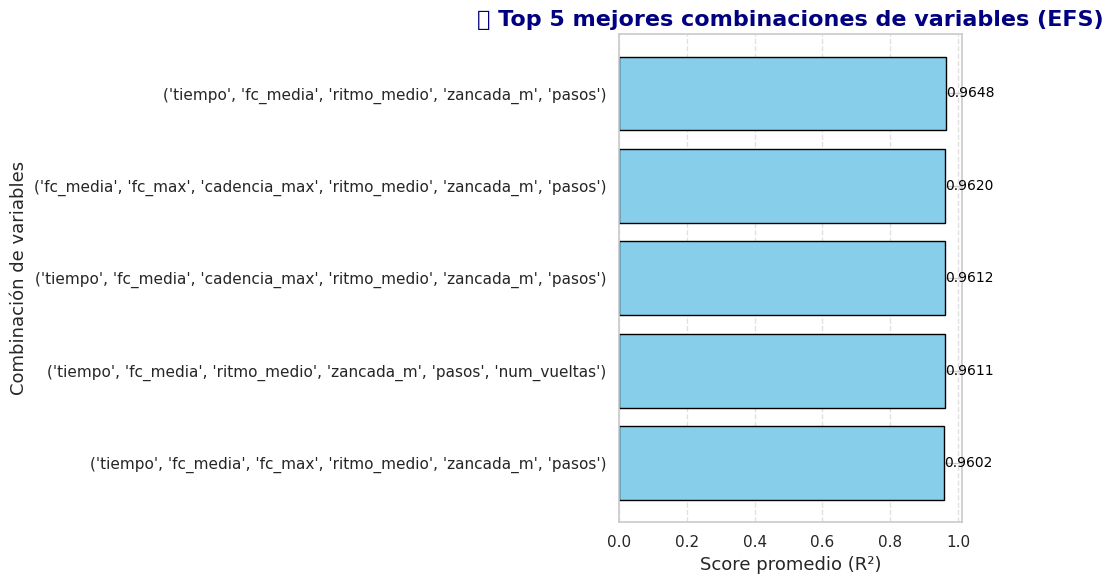

In [67]:
import matplotlib.pyplot as plt

# 5 mejores combinaciones
top_5 = resultados.sort_values(by='avg_score', ascending=False).head(5)

# Gráfico
plt.figure(figsize=(10, 6))

#Combinaciones
plt.barh(
    y=top_5['feature_names'].astype(str),
    width=top_5['avg_score'].astype(float),
    color='skyblue',
    edgecolor='black'
)

plt.gca().invert_yaxis()  # para que la mejor quede arriba
plt.title("🔹 Top 5 mejores combinaciones de variables (EFS)", fontsize=16, fontweight='bold', color='navy')
plt.xlabel("Score promedio (R²)", fontsize=13)
plt.ylabel("Combinación de variables", fontsize=13)
plt.grid(axis='x', linestyle='--', alpha=0.6)

for i, (score, name) in enumerate(zip(top_5['avg_score'], top_5['feature_names'])):
    plt.text(score + 0.0001, i, f"{score:.4f}", va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


<div align="center" style="font-size:20px;">

Las variables seleccionadas fueron:
tiempo, fc_media, ritmo_medio, zancada_m, y pasos, que resultaron ser las más relevantes para predecir el gasto calórico en mis entrenamientos.

</div>

<center><h1><b>Sequential Feature Selector (SFS)</b></h1></center>

In [68]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

est = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    LinearRegression()
)

kmax = min(8, X.shape[1])

sfs = SFS(
    estimator=est,
    k_features=(1, kmax),
    forward=True,
    floating=False,
    scoring='r2',
    cv=5,
    n_jobs=-1
).fit(X.values, y.values)

print("Mejor R² (CV):", round(sfs.k_score_, 6))
print("Variables seleccionadas:", list(sfs.k_feature_names_))


Mejor R² (CV): 0.959572
Variables seleccionadas: ['0', '2', '5', '6', '8', '9']


In [69]:
def sfs_result_table(sfs, X, scoring='r2'):
    filas = []
    for k in sorted(sfs.subsets_.keys()):
        sub = sfs.subsets_[k]
        idx = list(sub['feature_idx'])
        nombres = list(np.array(X.columns)[idx])
        filas.append({
            'k': k,
            'feature_idx': tuple(idx),
            'feature_names': tuple(nombres),
            'cv_scores': sub['cv_scores'],
            'avg_score': sub['avg_score']
        })
    df = pd.DataFrame(filas).sort_values('avg_score', ascending=False).reset_index(drop=True)

    if scoring == 'neg_mean_absolute_error':
        df['avg_mae(+)'] = -df['avg_score']
    return df

resultados_sfs = sfs_result_table(sfs, X, scoring='r2')
display(resultados_sfs.head(10))


,k,feature_idx,feature_names,cv_scores,avg_score
0,6,"(0, 2, 5, 6, 8, 9)","(distancia_km, fc_media, cadencia_max, ritmo_m...","[0.993123714102132, 0.9550681718508365, 0.9824...",0.959572
1,7,"(0, 2, 3, 5, 6, 8, 9)","(distancia_km, fc_media, fc_max, cadencia_max,...","[0.9908372231560231, 0.9599361298991624, 0.988...",0.958910
2,5,"(0, 2, 6, 8, 9)","(distancia_km, fc_media, ritmo_medio, zancada_...","[0.9924006136411052, 0.9547440575168327, 0.983...",0.958131
3,8,"(0, 2, 3, 5, 6, 8, 9, 10)","(distancia_km, fc_media, fc_max, cadencia_max,...","[0.9904068072878701, 0.9577983955768555, 0.987...",0.957626
4,4,"(0, 2, 6, 9)","(distancia_km, fc_media, ritmo_medio, pasos)","[0.9933808353201363, 0.9298958655312579, 0.981...",0.937768
5,3,"(0, 2, 9)","(distancia_km, fc_media, pasos)","[0.9885466512970097, 0.9632277794786108, 0.955...",0.908778
6,2,"(0, 9)","(distancia_km, pasos)","[0.9856636162793582, 0.9702796005151005, 0.942...",0.869146
7,1,"(0,)","(distancia_km,)","[0.9751865691249306, 0.9235676719785001, 0.949...",0.847987


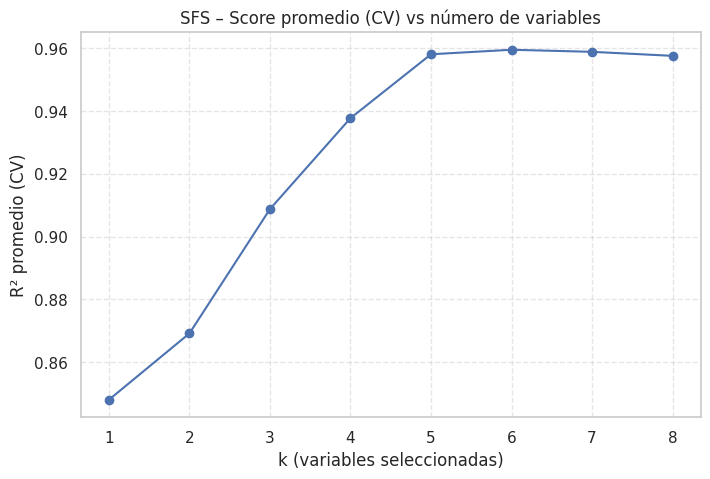

In [70]:
ks = sorted(sfs.subsets_.keys())
scores = [sfs.subsets_[k]['avg_score'] for k in ks]

plt.figure(figsize=(8,5))
plt.plot(ks, scores, marker='o')
plt.title('SFS – Score promedio (CV) vs número de variables')
plt.xlabel('k (variables seleccionadas)')
plt.ylabel('R² promedio (CV)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


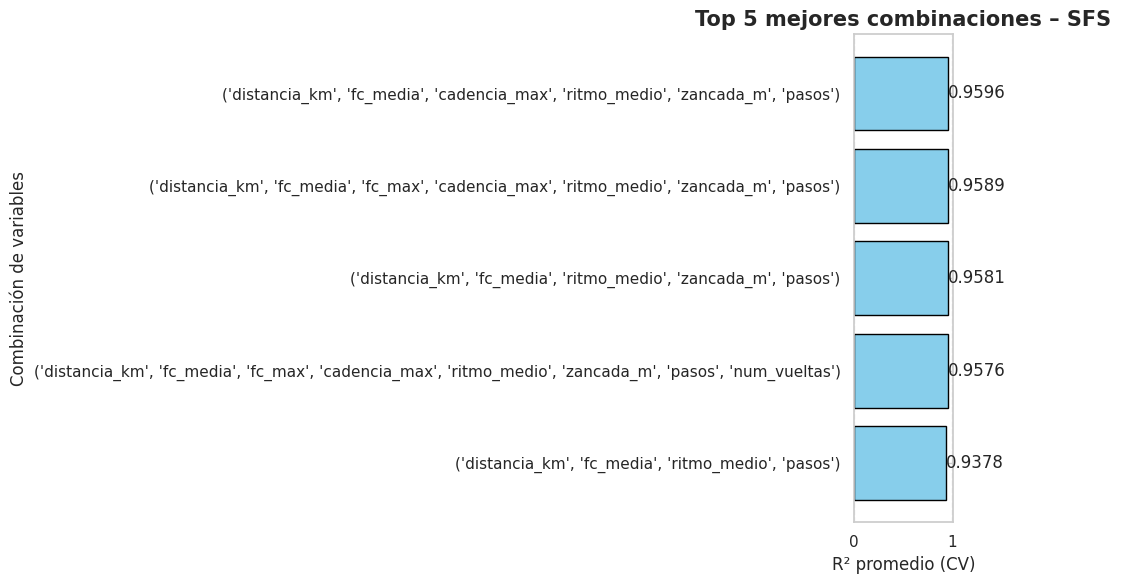

In [71]:
top5 = resultados_sfs.head(5)

plt.figure(figsize=(10,6))
plt.barh(
    y=top5['feature_names'].astype(str),
    width=top5['avg_score'].astype(float),
    color='skyblue', edgecolor='black'
)
plt.gca().invert_yaxis()
plt.title('Top 5 mejores combinaciones – SFS', fontsize=15, fontweight='bold')
plt.xlabel('R² promedio (CV)')
plt.ylabel('Combinación de variables')
for i, (sc, nm) in enumerate(zip(top5['avg_score'], top5['feature_names'])):
    plt.text(sc + 0.0001, i, f'{sc:.4f}', va='center')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<center><h1><b>Sequential Backward Selector (SBS)</b></h1></center>

In [72]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

est = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    LinearRegression()
)

kmax = min(8, X.shape[1])

sfs = SFS(
    estimator=est,
    k_features=(1, kmax),
    forward=False,
    floating=False,
    scoring='r2',
    cv=5,
    n_jobs=-1
).fit(X.values, y.values)

print("Mejor R² (CV):", round(sfs.k_score_, 6))
print("Variables seleccionadas:", list(sfs.k_feature_names_))


Mejor R² (CV): 0.96204
Variables seleccionadas: ['2', '3', '5', '6', '8', '9']


In [73]:
def sfs_result_table(sfs, X, scoring='r2'):
    filas = []
    for k in sorted(sfs.subsets_.keys()):
        sub = sfs.subsets_[k]
        idx = list(sub['feature_idx'])
        nombres = list(np.array(X.columns)[idx])
        filas.append({
            'k': k,
            'feature_idx': tuple(idx),
            'feature_names': tuple(nombres),
            'cv_scores': sub['cv_scores'],
            'avg_score': sub['avg_score']
        })
    df = pd.DataFrame(filas).sort_values('avg_score', ascending=False).reset_index(drop=True)

    if scoring == 'neg_mean_absolute_error':
        df['avg_mae(+)'] = -df['avg_score']
    return df

resultados_sfs = sfs_result_table(sfs, X, scoring='r2')
display(resultados_sfs.head(10))

,k,feature_idx,feature_names,cv_scores,avg_score
0,6,"(2, 3, 5, 6, 8, 9)","(fc_media, fc_max, cadencia_max, ritmo_medio, ...","[0.9877714172755898, 0.9572826641799465, 0.975...",0.962040
1,7,"(2, 3, 5, 6, 8, 9, 10)","(fc_media, fc_max, cadencia_max, ritmo_medio, ...","[0.987429956319802, 0.9568827697526008, 0.9758...",0.962034
2,5,"(2, 5, 6, 8, 9)","(fc_media, cadencia_max, ritmo_medio, zancada_...","[0.9890581929053835, 0.9493104460833584, 0.969...",0.959881
3,4,"(2, 6, 8, 9)","(fc_media, ritmo_medio, zancada_m, pasos)","[0.9882367300840632, 0.9490887325003808, 0.971...",0.959441
4,8,"(0, 2, 3, 5, 6, 8, 9, 10)","(distancia_km, fc_media, fc_max, cadencia_max,...","[0.9904068072878701, 0.9577983955768555, 0.987...",0.957626
5,9,"(0, 1, 2, 3, 5, 6, 8, 9, 10)","(distancia_km, tiempo, fc_media, fc_max, caden...","[0.917526966381895, 0.9629945742334285, 0.9868...",0.948093
6,10,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10)","(distancia_km, tiempo, fc_media, fc_max, caden...","[0.9163931808600749, 0.9668253629827096, 0.956...",0.934786
7,3,"(2, 6, 9)","(fc_media, ritmo_medio, pasos)","[0.9696129318281852, 0.8788489406822713, 0.925...",0.918197
8,11,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)","(distancia_km, tiempo, fc_media, fc_max, caden...","[0.8630709941780855, 0.9318363892427478, 0.935...",0.913253
9,2,"(2, 9)","(fc_media, pasos)","[0.966098953563476, 0.9398630401813425, 0.9103...",0.909465


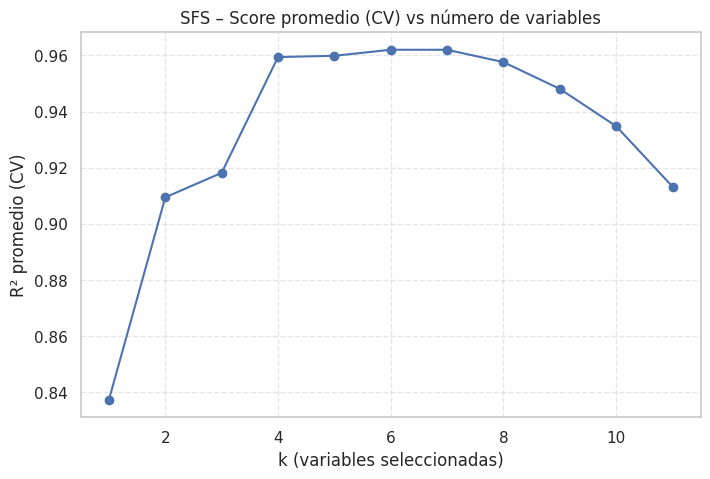

In [74]:
ks = sorted(sfs.subsets_.keys())
scores = [sfs.subsets_[k]['avg_score'] for k in ks]

plt.figure(figsize=(8,5))
plt.plot(ks, scores, marker='o')
plt.title('SFS – Score promedio (CV) vs número de variables')
plt.xlabel('k (variables seleccionadas)')
plt.ylabel('R² promedio (CV)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


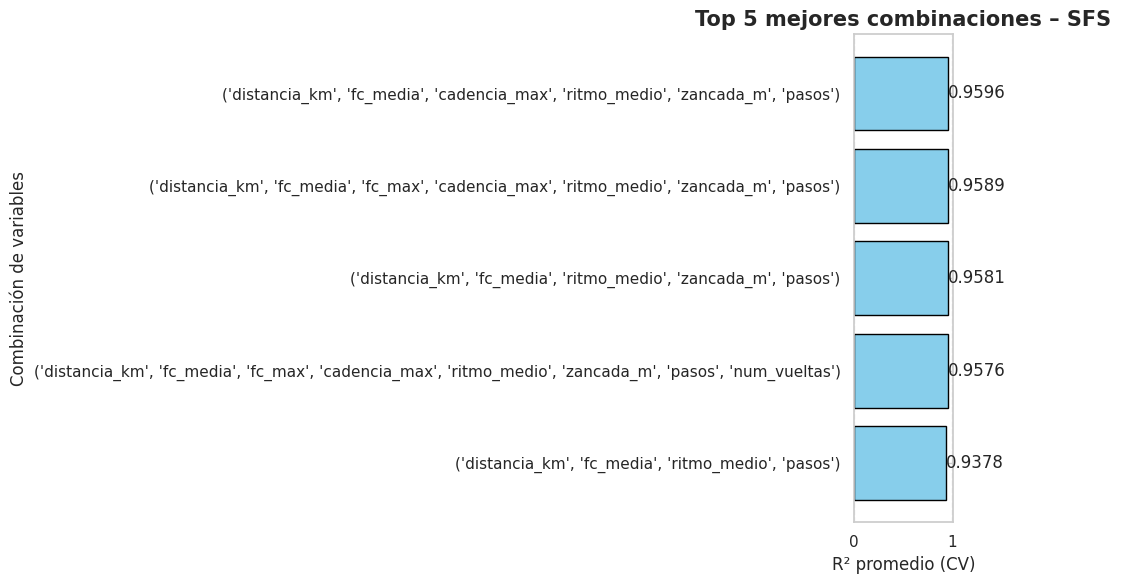

In [75]:
op5 = resultados_sfs.head(5)

plt.figure(figsize=(10,6))
plt.barh(
    y=top5['feature_names'].astype(str),
    width=top5['avg_score'].astype(float),
    color='skyblue', edgecolor='black'
)
plt.gca().invert_yaxis()
plt.title('Top 5 mejores combinaciones – SFS', fontsize=15, fontweight='bold')
plt.xlabel('R² promedio (CV)')
plt.ylabel('Combinación de variables')
for i, (sc, nm) in enumerate(zip(top5['avg_score'], top5['feature_names'])):
    plt.text(sc + 0.0001, i, f'{sc:.4f}', va='center')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<b>El método<i> Exhaustive Feature Selection (EFS) </i>  alcanzó el mejor desempeño con un R² = 0.9647, al seleccionar las variables:
tiempo, fc_media, ritmo_medio, zancada_m y pasos.

Esto lo que nos muestra es una combinacion equilibrada


Por otro lado los metodos de envoltura <i> Sequential Forward Selection (SFS) </i> y <i>Sequential Backward Selection (SBS) </i>, se obtuvieron desempeños de R² ≈ 0.96, destacando nuevamente las variables relacionadas con tiempo, frecuencia cardíaca y pasos como las de mayor poder predictivo.

Los distintos métodos de selección aplicados tanto estadísticos como basados en modelos coinciden en que las principales determinantes del gasto calórico son el tiempo total de actividad, la distancia recorrida, el número de pasos y la frecuencia cardíaca media, complementadas por variables que describen la eficiencia del movimiento.</h1>
